In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Data preprocessing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)

Epoch 1/50


/Users/vincent/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/vincent/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 - 112s - 372ms/step - accuracy: 0.8605 - loss: 0.5601 - val_accuracy: 0.3730 - val_loss: 3.0927 - learning_rate: 0.0010
Epoch 2/50
300/300 - 108s - 359ms/step - accuracy: 0.9593 - loss: 0.1380 - val_accuracy: 0.9836 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 3/50
300/300 - 105s - 350ms/step - accuracy: 0.9702 - loss: 0.1049 - val_accuracy: 0.9883 - val_loss: 0.0393 - learning_rate: 0.0010
Epoch 4/50
300/300 - 104s - 347ms/step - accuracy: 0.9743 - loss: 0.0888 - val_accuracy: 0.9917 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 5/50
300/300 - 104s - 348ms/step - accuracy: 0.9768 - loss: 0.0801 - val_accuracy: 0.9876 - val_loss: 0.0368 - learning_rate: 0.0010
Epoch 6/50
300/300 - 110s - 365ms/step - accuracy: 0.9798 - loss: 0.0717 - val_accuracy: 0.9939 - val_loss: 0.0236 - learning_rate: 9.0484e-04
Epoch 7/50
300/300 - 106s - 353ms/step - accuracy: 0.9833 - loss: 0.0596 - val_accuracy: 0.9931 - val_loss: 0.0201 - learning_rate: 8.1873e-04
Epoch 8/50
300/300 - 119s - 39

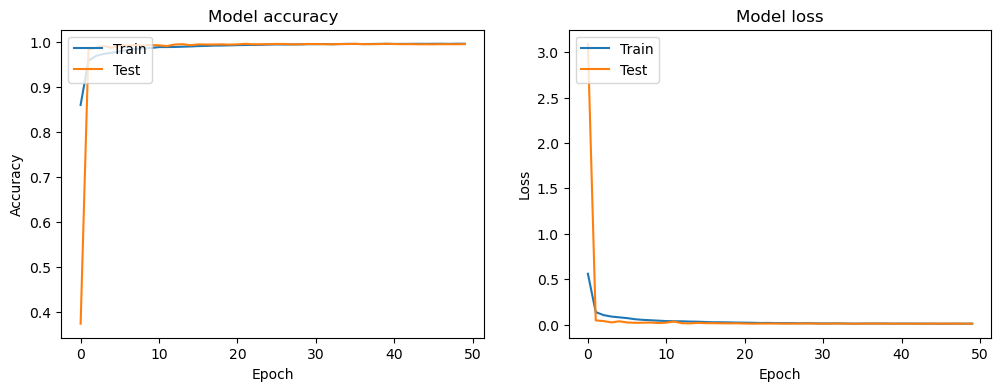

In [15]:
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())
    
lr_callback = LearningRateScheduler(scheduler)

# Train
history = model.fit(datagen.flow(x_train, y_train, batch_size=200),
                    validation_data=(x_test, y_test),
                    epochs=50,
                    verbose=2,
                    callbacks=[lr_callback])

# Evaluate 
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {scores[0]}')
print(f'Test accuracy: {scores[1]}')


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

model.save('mnist_cnn_model.h5')

In [17]:
# Make predictions on the test set
x_testt = pd.read_csv("test.csv")
x_testt = x_testt.values
x_testt = x_testt.reshape(x_testt.shape[0], 28, 28, 1).astype('float32') / 255
predictions = model.predict(x_testt)
predictions_classes = np.argmax(predictions, axis=1)

submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(predictions_classes) + 1),
    'Label': predictions_classes
})

submission_df.to_csv('mnist_submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step
